# Import Libraries

In [31]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, HTML

In [32]:
path = kagglehub.dataset_download("nandini1999/perfume-recommendation-dataset")
data = pd.read_csv(path + '/final_perfume_data.csv', encoding='unicode_escape')
data.fillna('', inplace=True)

# Cleaning non-UTF-8 Characters
for i in range(len(data['Description'])):
    data.loc[i, "Description"] = re.sub(r'[^\x20-\x7E]', '', data['Description'][i])

data.head()

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...


In [33]:
#Vectorize the features (Extended Description )
extendedDesc = data['Description'] + ' ' + data['Notes']
vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(extendedDesc.values.astype('U'))
similarity_matrix = cosine_similarity(feature_vector, feature_vector)

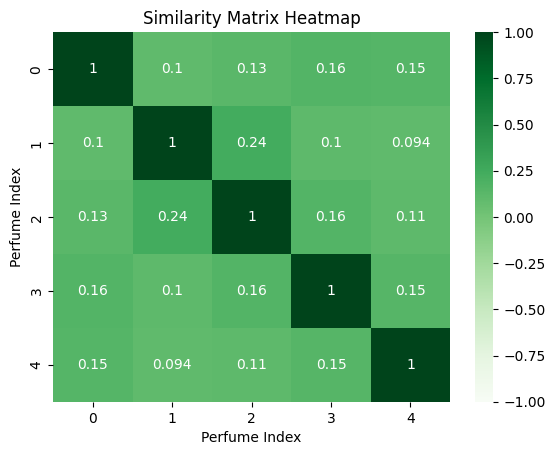

In [34]:
# Plot the heatmap
mat = similarity_matrix[:5,:5]
sns.heatmap(mat, cmap="Greens",  vmin=-1, annot=True)
plt.title("Similarity Matrix Heatmap")
plt.xlabel("Perfume Index")
plt.ylabel("Perfume Index")
plt.show()

In [35]:
def recommend(liked, n=5):

    indices = data[data['Name'].isin(liked)].index

    similarity_scores = similarity_matrix[indices]

    # Similarity Average of all perfumes
    average_similarity = similarity_scores.mean(axis=0)
    average_similarity[indices] = 0

    top_indices = average_similarity.argsort()[::-1][:n] #argsort returns indicies

    return data.iloc[top_indices][['Name', 'Brand', 'Description', 'Notes', 'Image URL']]

In [36]:
liked_perfumes = ['A Blvd. Called Sunset Eau de Parfum	', 'Sola Parfum', 'Young Hearts Eau de Parfum', 'Golden Moka Eau de Parfum', 'Heartless Helen Eau de Parfum']  # Replace with the names of perfumes liked by the client
recommended = recommend(liked_perfumes)

In [ ]:
def display_perfume_info(perfumes):

    perfume_js_array = [
        {
            "image": row[1]["Image URL"],
            "name": row[1]["Name"],
            "brand": row[1]["Brand"],
            "description": row[1]["Description"],
            "notes": row[1]["Notes"]
        } for row in perfumes.iterrows()
    ]

    html_content = ""

    for row in perfumes.iterrows():
        perfume_html = f"""
        <html lang="en">
        <head>
          <meta charset="UTF-8" />
          <meta name="viewport" content="width=device-width, initial-scale=1.0"/>
          <title>Perfume Viewer</title>
          <style>
            body {{
              font-family: 'Segoe UI', sans-serif;
              background-color:rgba(0, 0, 0, 0.1));
              margin: 0;
              padding: 30px;
              display: flex;
              justify-content: center;
              align-items: center;
              height: 100vh;
            }}

            .carousel-container {{
              width: 90%;
              max-width: 900px;
              background-color: rgb(11, 56, 102);
              border-radius: 15px;
              box-shadow: 0 8px 20px rgba(0, 0, 0, 0.1);
              overflow: hidden;
              transition: all 0.5s ease;
            }}

            .perfume {{
              display: flex;
              flex-direction: row;
              align-items: center;
              padding: 20px;
              gap: 20px;
              animation: fadeIn 0.5s ease-in-out;
              background-color: rgb(11, 56, 102);
            }}

            .perfume img {{
              width: 280px;
              height: 280px;
              object-fit: contain;
              border-radius: 12px;
            }}

            .info h3 {{
              margin: 0;
              color: rgb(255, 255, 255);
            }}

            #Description {{
              margin: 15px 0;
              color: rgb(255, 255, 255);
            }}

            #Brand {{
              margin: 7px 0;
              color: rgb(255, 255, 255);
            }}

            #Notes {{
              margin: 0px 0;
              color: rgb(255, 255, 255);
            }}

            .buttons {{
              display: flex;
              justify-content: space-between;
              padding: 15px 20px;
              border-top: 1px solid #eee;
              background-color:rgb(15, 62, 109);
        ;
            }}

            .buttons button {{
              padding: 10px 12px;
              background-color:rgb(13, 47, 70);
              color: white;
              border: none;
              border-radius: 8px;
              cursor: pointer;
              font-weight: bold;
              transition: background 0.3s ease;
            }}

            .buttons button:hover {{
              background-color: #2980b9;
            }}

            @keyframes fadeIn {{
              from {{opacity: 0; transform: translateY(10px);}}
              to {{opacity: 1; transform: translateY(0);}}
            }}
  </style>
        </head>
        <body>

        <div class="carousel-container" id="carousel">
          <!-- Content injected by JS -->
        </div>

        <script>
          const perfumes ={perfume_js_array};

          let currentIndex = 0;

          function renderPerfume(index) {{
            const p = perfumes[index];
            document.getElementById("carousel").innerHTML = `
              <div class="perfume">
                <img src="${{p.image}}" alt="${{p.name}}">
                <div class="info">
                  <h3>${{p.name}}</h3>
                  <p id='Brand'><strong>Brand:</strong> ${{p.brand}}</p>
                  <p id='Description'><strong>Description:</strong> ${{p.description}}</p>
                  <p id='Notes'><strong>Notes:</strong> ${{p.notes}}</p>
                </div>
              </div>
              <div class="buttons">
                <button onclick="prevPerfume()">← Prev</button>
                <button onclick="nextPerfume()">Next →</button>
              </div>
            `;
          }}

          function prevPerfume() {{
            currentIndex = (currentIndex - 1 + perfumes.length) % perfumes.length;
            renderPerfume(currentIndex);
          }}

          function nextPerfume() {{
            currentIndex = (currentIndex + 1) % perfumes.length;
            renderPerfume(currentIndex);
          }}

          // Initial render
          renderPerfume(currentIndex);
        </script>

        </body>
        </html>
        """
        html_content += perfume_html

    display(HTML(html_content))

In [ ]:
display_perfume_info(recommended)